In [2]:
!unzip "/content/drive/MyDrive/datasets/archive (1).zip" -d "/content/drive/MyDrive/datasets/heart_attack"

Archive:  /content/drive/MyDrive/datasets/archive (1).zip
  inflating: /content/drive/MyDrive/datasets/heart_attack/heart.csv  
  inflating: /content/drive/MyDrive/datasets/heart_attack/o2Saturation.csv  


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
heart = pd.read_csv("/content/drive/MyDrive/datasets/heart_attack/heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
len(heart[heart.output==1])

165

In [10]:
len(heart[heart.output==0])

138

Balanced.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart.drop("output", axis = 1)
y = heart["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

X_val.shape, y_val.shape, X_test.shape, y_test.shape, X_train.shape, y_train.shape

((61, 13), (61,), (61, 13), (61,), (181, 13), (181,))

In [15]:
model1 = RandomForestClassifier()

model1.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
model1.score(X_val, y_val)

0.8360655737704918

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_val, y_val)

0.8524590163934426

In [20]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, y_train)
svc.score(X_val, y_val)

0.6229508196721312

In [27]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [28]:
def evaluate_preds(y_true, y_preds):
  acc = accuracy_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  prec = precision_score(y_true, y_preds)

  metric_dict = {"accuracy": acc,
                 "recall": recall,
                 "f1": f1,
                 "precison": prec}

  print(f"Accuracy: {acc*100:.2f}%")
  print(f"Recall: {recall:.2f}")
  print(f"F1: {f1:.2f}")
  print(f"Precision: {prec:.2f}")

  return metric_dict

In [30]:
y_preds = model1.predict(X_val)
results = evaluate_preds(y_val, y_preds)
results

Accuracy: 83.61%
Recall: 0.82
F1: 0.84
Precision: 0.87


{'accuracy': 0.8360655737704918,
 'recall': 0.8181818181818182,
 'f1': 0.84375,
 'precison': 0.8709677419354839}

In [31]:
y_preds2 = gnb.predict(X_val)
results2 = evaluate_preds(y_val, y_preds2)
results2

Accuracy: 85.25%
Recall: 0.88
F1: 0.87
Precision: 0.85


{'accuracy': 0.8524590163934426,
 'recall': 0.8787878787878788,
 'f1': 0.8656716417910447,
 'precison': 0.8529411764705882}

In [43]:
models = [model1, gnb, svc]
results_final = {}

for model in models:
  preds = model.predict(X_val)
  results = evaluate_preds(y_val,preds)
  results_final[model] = results

results_final

Accuracy: 83.61%
Recall: 0.82
F1: 0.84
Precision: 0.87
Accuracy: 85.25%
Recall: 0.88
F1: 0.87
Precision: 0.85
Accuracy: 62.30%
Recall: 0.85
F1: 0.71
Precision: 0.61


{RandomForestClassifier(): {'accuracy': 0.8360655737704918,
  'recall': 0.8181818181818182,
  'f1': 0.84375,
  'precison': 0.8709677419354839},
 GaussianNB(): {'accuracy': 0.8524590163934426,
  'recall': 0.8787878787878788,
  'f1': 0.8656716417910447,
  'precison': 0.8529411764705882},
 SVC(): {'accuracy': 0.6229508196721312,
  'recall': 0.8484848484848485,
  'f1': 0.7088607594936709,
  'precison': 0.6086956521739131}}

In [42]:
results_final.keys()

dict_keys([RandomForestClassifier(), GaussianNB(), SVC()])

In [54]:
models = results_final.keys()
models = list(models)
models

[RandomForestClassifier(), GaussianNB(), SVC()]

In [68]:
scores = list(results_final.values())
scores_list = []

for element_dict in scores:
  element_list = list(element_dict)
  scores_list.append(element_list)

scores_list

[['accuracy', 'recall', 'f1', 'precison'],
 ['accuracy', 'recall', 'f1', 'precison'],
 ['accuracy', 'recall', 'f1', 'precison']]

In [81]:
scores[0]

{'accuracy': 0.8360655737704918,
 'recall': 0.8181818181818182,
 'f1': 0.84375,
 'precison': 0.8709677419354839}

In [86]:
scores1 = list(scores[0].values())
scores1

[0.8360655737704918, 0.8181818181818182, 0.84375, 0.8709677419354839]

In [105]:
accs = []
precs = []
f1s = []
recalls = []

for i in range(len(scores)):
  accs.append(list(scores[i].values())[0])
  precs.append(list(scores[i].values())[0])
  f1s.append(list(scores[i].values())[0])
  recalls.append(list(scores[i].values())[0])

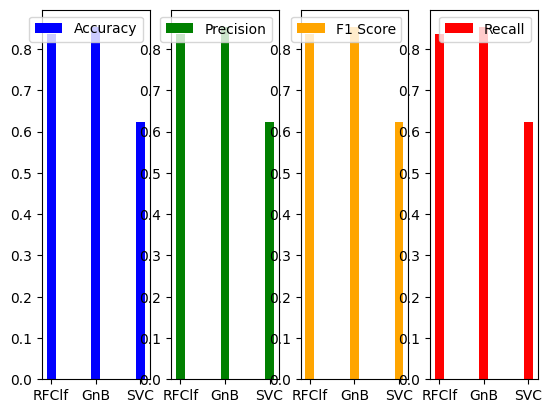

In [135]:
xs = ["RFClf", "GnB", "SVC"]

plt.subplot(1,4,1)
plt.bar(xs, height=accs, width=0.2, label="Accuracy", color="blue")
plt.legend()

plt.subplot(1,4,2)
plt.bar(xs, height=precs, width=0.2, label="Precision", color="green")
plt.legend()

plt.subplot(1,4,3)
plt.bar(xs, height=f1s, width=0.2, label="F1 Score", color="orange")
plt.legend()

plt.subplot(1,4,4)
plt.bar(xs, height=recalls, width=0.2, label="Recall", color="red")
plt.legend()


plt.xticks(xs)
plt.show()